In [ ]:
#Here two models for the bacteria Corynebacterium glutamicum are assessed to modificate the C feedstock on the production of
#L-lysine. Glycerol is specially evaluated because it is more sustainable than the current glucose source used.
#

In [2]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

In [ ]:
#Assess alternative carbon source in two model fo C. glutamicum
                ################ #**MODEL    iCW773** ##########################

In [3]:
model = read_sbml_model('iCW773_test7.xml')
#model = read_sbml_model('iCGB21FR.xml')

No objective coefficients in model. Unclear what should be optimized


In [4]:
for metabolite in model.metabolites:
    if '_e' in metabolite.id:
        metabolite.compartment='e' #finds the extracellular metabolites, assigns to compartment e
for metabolite in model.metabolites:
    if '_c' in metabolite.id:
        metabolite.compartment='c' #finds the cytoplasmic metabolites, assigns to compartment c

In [5]:
model.compartments

{'c': '', 'e': ''}

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
model

Name,iCW773
Memory address,19793634f10
Number of metabolites,949
Number of reactions,1207
Number of genes,773
Number of groups,0
Objective expression,0
Compartments,"c, e"


In [9]:
model.metabolites.glc_D_e
#model.metabolites.glc__D_e

Metabolite identifier,glc_D_e
Name,D_Glucose
Memory address,0x1979385d110
Formula,C6H12O6
Compartment,e
In 3 reaction(s),"GLCptspp, GLCabcpp, EX_glc_e"


In [11]:
model.exchanges.EX_glc_e

Reaction identifier,EX_glc_e
Name,D_Glucose exchange
Memory address,0x197978fbcd0
Stoichiometry,glc_D_e <-- D_Glucose <--
GPR,
Lower bound,-4.67
Upper bound,-4.09906


In [12]:
model.reactions.DAPDC

Reaction identifier,DAPDC
Name,diaminopimelate decarboxylase
Memory address,0x19797ba68d0
Stoichiometry,"26dap_M_c + h_c --> co2_c + lys_L_c meso-2,6_Diaminoheptanedioate + H+ --> CO2 + L_Lysine"
GPR,cg1334 and cg2343
Lower bound,0.0365565828071713
Upper bound,1.49946356856463


In [14]:
model.exchanges.EX_glc_e.upper_bound=0 #Glucose cannot set at 0 before changing the bounds in this model

In [15]:
#First we can find all carbon exchange reactions:
carbon = []
carbon_names = []

for reaction in model.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            carbon.append(reaction.id)
            carbon_names.append(reaction.name) 
            
# Second, we can establish the baseline case for later reference
with model:
    max_base_growth = model.slim_optimize()
    model.objective = model.reactions.DAPDC
    max_base_production = model.slim_optimize()

    
# Now, we will loop through every carbon source in the model and see how good it produces L-lysine.     
# We define the lists we are going to be using
max_growth = []
max_production = []
medium=model.medium

with model:
    for reaction in carbon:
        medium['EX_glc_e'] = 0
        medium[reaction]=1
        model.medium = medium
        with model:
            max_growth.append(model.slim_optimize(error_value=0.))
            model.objective = model.reactions.DAPDC
            max_production.append(model.slim_optimize(error_value=0.))  # Determining max production
        medium[reaction]=0        

# We can now collect all of the data in a dataframe
production = {'Carbon': carbon_names,
             'Growth': max_growth,
             'Production': max_production}
df = pd.DataFrame(production, columns = ['Carbon', 'Growth', 'Production'])
print(df)

                                     Carbon  Growth  Production
0    meso-2,6_Diaminoheptanedioate exchange     0.0         0.0
1                           3'-AMP exchange     0.0         0.0
2                           3'-cmp exchange     0.0         0.0
3                           3'-GMP exchange     0.0         0.0
4                           3'-UMP exchange     0.0         0.0
..                                      ...     ...         ...
128                       Xanthine exchange     0.0         0.0
129        Xanthosine 5'-phosphate exchange     0.0         0.0
130                     Xanthosine exchange     0.0         0.0
131                       D_Xylose exchange     0.0         0.0
132                               EX_BIOTIN     0.0         0.0

[133 rows x 3 columns]


In [16]:
#We remove all the carbon exchanges where growth becomes equal to 0
df= df[df['Growth'] != 0]
print(df)

Empty DataFrame
Columns: [Carbon, Growth, Production]
Index: []


In [15]:
# It seems that the model doesn't allow to modify the carbon source. 
#Two strategies has been tested to such purpose. Either infeasible or 0 in all available carbon sources
#The bacteria only can growth on glucose?
#The plan will be to add three genes confering the skill to the bacteria of use glycerol as sole carbon source

In [16]:
#Adding three new genes to incorporate the skill to metbaolize glycerol. From Ecoli 
# glpF (glycerol transporter) = glycerol out --> glycerol in
# glpK = ATP + glycerol in --> ADP + H + sn-glycerol 3-phosphate
# glpD = a quinone + sn-glycerol 3-phosphate --> a quinol + dihydroxyacetone phosphate (which is already a glycolisi intermediate)
#However the model already incorporate the glycerol metabolites so no clear if it is possible to add a new pathway or is the model
#shich is restricted to switch the feedstock

In [ ]:
############################################################################################################################
##############################################################################################################################

In [ ]:
#After realizing that the model doesn't allow to change the carbon source. It is decided to test the same sytrategy 
                                ################## Model: iCGB21FR #####################

In [3]:
model = read_sbml_model('iCGB21FR.xml')

OSError: The file with 'iCGB21FR.xml' does not exist, or is not an SBML string. Provide the path to an existing SBML file or a valid SBML string representation:


In [43]:
model

Name,iCBG21FR
Memory address,23f4d06d190
Number of metabolites,1042
Number of reactions,1539
Number of genes,805
Number of groups,102
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [45]:
model.exchanges.EX_glc__D_e #validate target compound. No need of touching the bounds

Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x23f4c393750
Stoichiometry,glc__D_e <=> D-Glucose <=>
GPR,
Lower bound,-10.0
Upper bound,1000.0


In [46]:
model.reactions.DAPDC #validate target reaction

Reaction identifier,DAPDC
Name,Diaminopimelate decarboxylase
Memory address,0x23f4e9a83d0
Stoichiometry,"26dap__M_c + h_c --> co2_c + lys__L_c Meso-2,6-Diaminoheptanedioate + H+ --> CO2 + L-Lysine"
GPR,lcl_NC_006958_1_prot_WP_011014180_1_1145 or lcl_NC_006958_1_prot_WP_011265883_1_2027
Lower bound,0.0
Upper bound,1000.0


In [47]:
#First we can find all carbon exchange reactions:
carbon = []
carbon_names = []

for reaction in model.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            carbon.append(reaction.id)
            carbon_names.append(reaction.name) 
            
# Second, we can establish the baseline case for later reference
with model:
    max_base_growth = model.slim_optimize()
    model.objective = model.reactions.DAPDC
    max_base_production = model.slim_optimize()
    #Units: mmol/gDW*h

    
# Now, we will loop through every carbon source in the model and see how good it produces L-lysine.     
# We define the lists we are going to be using
max_growth = []
max_production = []
medium=model.medium

with model:
    for reaction in carbon:
        medium['EX_glc__D_e'] = 0
        medium[reaction]=1
        model.medium = medium
        with model:
            max_growth.append(model.slim_optimize(error_value=0.))
            model.objective = model.reactions.DAPDC
            max_production.append(model.slim_optimize(error_value=0.))  # Determining max production
        medium[reaction]=0        

# We can now collect all of the data in a dataframe
production = {'Carbon': carbon_names,
             'Growth': max_growth,
             'Production': max_production}
df = pd.DataFrame(production, columns = ['Carbon', 'Growth', 'Production'])
print(df)

                                                Carbon    Growth  Production
0                                   D-Glucose exchange  0.281898    0.093681
1                          2 Phosphoglycolate exchange  0.241602    0.080290
2                                   L-Leucine exchange  0.243175    0.080813
3                       3-Methylbutanoic acid exchange  0.242181    0.080482
4    L-alanine-D-glutamate-meso-2,6-diaminoheptaned...  0.240053    0.079775
..                                                 ...       ...         ...
148                           L-Phenylalanine exchange  0.244366    0.081209
149                              L-Tryptophan exchange  0.241505    0.080258
150                                L-Tyrosine exchange  0.242447    0.080571
151                                  Pyruvate exchange  0.246248    0.081834
152        Exchange reaction for 3,4-Dihydroxybenzoate  0.083789    0.027845

[153 rows x 3 columns]


In [48]:
#We remove all the carbon exchanges where growth becomes equal to 0
df= df[df['Growth'] != 0]
print(df)

                                                Carbon    Growth  Production
0                                   D-Glucose exchange  0.281898    0.093681
1                          2 Phosphoglycolate exchange  0.241602    0.080290
2                                   L-Leucine exchange  0.243175    0.080813
3                       3-Methylbutanoic acid exchange  0.242181    0.080482
4    L-alanine-D-glutamate-meso-2,6-diaminoheptaned...  0.240053    0.079775
..                                                 ...       ...         ...
148                           L-Phenylalanine exchange  0.244366    0.081209
149                              L-Tryptophan exchange  0.241505    0.080258
150                                L-Tyrosine exchange  0.242447    0.080571
151                                  Pyruvate exchange  0.246248    0.081834
152        Exchange reaction for 3,4-Dihydroxybenzoate  0.083789    0.027845

[153 rows x 3 columns]


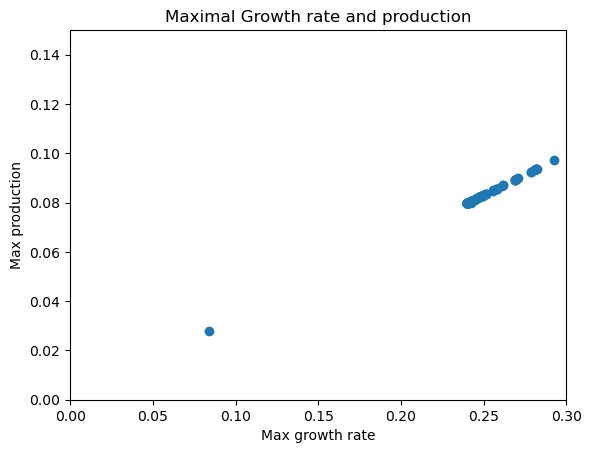

In [49]:
# And we can create a scatterplot of the production over growth to view the distribution
plt.scatter(df.get('Growth'), df.get('Production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max production')
plt.xlim(0, 0.3)
plt.ylim(0, 0.15)
plt.title('Maximal Growth rate and production')
plt.savefig("Pau_trials_test")
plt.show()

In [50]:
#The original growth and production of L-lysine using glucose:
print(max_base_growth,max_base_production)

0.5706600731225523 0.18964382806175384


In [51]:
#top 15 highest growth
df.sort_values(by='Growth', ascending=False).head(15)

,Carbon,Growth,Production
32,"Amylose (n=300 repeat units, alpha-1,4-glc) ex...",2.818378,0.936614
31,Starch n=1200 repeat units (300 repeat units a...,2.818378,0.936614
77,"Glycogen (n=1500 repeat units) (glc alpha 1,4/...",2.818378,0.936614
94,EX malthp LPAREN e RPAREN,0.494439,0.164314
95,Maltohexaose exchange,0.456842,0.151819
96,Maltopentaose exchange,0.419244,0.139325
97,Maltotetraose exchange,0.381646,0.126830
30,Maltotriose exchange,0.350017,0.116319
120,Raffinose exchange,0.338081,0.112352
29,Maltose exchange,0.318387,0.105807


In [11]:
#It seems that just substrates based on glucose can lead to an increase of the base growth rate and production. 
#Other alternative different to glucose doesn't increase the baseline
#Starch looks really promising although it is still a non sustanaible feedstock
# Let's try glicerol


In [52]:
model.exchanges.query('Glycerol', 'name') #The model doesn't present the exchange with glycerol, just a intermediate
#Glycerol cannot be tested in this model as a feedstock. Add a new pathway?

[<Reaction EX_glyc3p_e at 0x23f4f3eb6d0>]

In [53]:
model.reactions.EX_glyc3p_e #It incorporates the exchange reaction of phosphorated version of Glycerol.
#This is actually the first step of the reaction of metabolitzation of Glycerol 

Reaction identifier,EX_glyc3p_e
Name,Glycerol 3-phosphate exchange
Memory address,0x23f4f3eb6d0
Stoichiometry,glyc3p_e --> Glycerol 3-phosphate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [54]:
#Let's check in which reaction is Glyc3p used
model.reactions.query('Glycerol 3-phosphate', 'name')

[<Reaction GLYC3Pabc at 0x23f4ec50bd0>,
 <Reaction GLYC3Pabcpp at 0x23f4ec77ad0>,
 <Reaction EX_glyc3p_e at 0x23f4f3eb6d0>]

In [2]:
#C. glutamicum has been engineered to use glycerol from the following Ecoli genes
#Let's check if the reactions already exists in the model
# glpF (glycerol transporter) = glycerol out --> glycerol in = It seems that the uptake takes place as a phosphorated form
# glpK = ATP + glycerol in --> ADP + H + sn-glycerol 3-phosphate #We do not need this reation bc it is already phosphorated
# glpD = a quinone + sn-glycerol 3-phosphate --> a quinol + dihydroxyacetone phosphate (which is already a glycolisi intermediate)
# Let's check is glpD reaction is already in the model
#However the model already incorporate the glycerol metabolites so no clear if it is possible to add a new pathway or is the model
#shich is restricted to switch the feedstock

In [55]:
model.reactions.GLYC3Pabc #Glyc3p uptake 1

Reaction identifier,GLYC3Pabc
Name,Sn-Glycerol 3-phosphate transport via ABC system
Memory address,0x23f4ec50bd0
Stoichiometry,atp_c + glyc3p_e + h2o_c --> adp_c + glyc3p_c + h_c + pi_c ATP + Glycerol 3-phosphate + H2O --> ADP + Glycerol 3-phosphate + H+ + Phosphate
GPR,lcl_NC_006958_1_prot_WP_011013851_1_705 or (lcl_NC_006958_1_prot_WP_011014325_1_1345 and...
Lower bound,0.0
Upper bound,1000.0


In [56]:
model.reactions.GLYC3Pabcpp #It seems similar to the uptake

Reaction identifier,GLYC3Pabcpp
Name,Sn-Glycerol 3-phosphate transport via ABC system (periplasm)
Memory address,0x23f4ec77ad0
Stoichiometry,atp_c + glyc3p_p + h2o_c --> adp_c + glyc3p_c + h_c + pi_c ATP + Glycerol 3-phosphate + H2O --> ADP + Glycerol 3-phosphate + H+ + Phosphate
GPR,lcl_NC_006958_1_prot_WP_011013479_1_216
Lower bound,0.0
Upper bound,1000.0


In [15]:
model.reactions.EX_glyc3p_e #Glycerol uptake again

Reaction identifier,EX_glyc3p_e
Name,Glycerol 3-phosphate exchange
Memory address,0x23f4b970f90
Stoichiometry,glyc3p_e --> Glycerol 3-phosphate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [21]:
model.metabolites.dhap_c

Metabolite identifier,dhap_c
Name,Dihydroxyacetone phosphate
Memory address,0x23f408786d0
Formula,C3H5O6P
Compartment,c
In 9 reaction(s),"G3PD1, FBA, MGSA, INSCR, QULNS, ALKP, G3PD5, TPI, G3PD"


In [22]:
model.reactions.G3PD1
#It seems that all reactions are already available in the model. 
#Let's test a medium with glycerol3p instead of glucose

Reaction identifier,G3PD1
Name,Glycerol-3-phosphate dehydrogenase (NAD)
Memory address,0x23f4b05b810
Stoichiometry,glyc3p_c + nad_c <=> dhap_c + h_c + nadh_c Glycerol 3-phosphate + Nicotinamide adenine dinucleotide <=> Dihydroxyacetone phosphate + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,lcl_NC_006958_1_prot_WP_003858849_1_1277
Lower bound,-1000.0
Upper bound,1000.0


In [57]:
model.medium #Glycerol3p is not present in the original medium
#Feedstock: glucose

{'EX_glc__D_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_h_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_urea_e': 10.0,
 'EX_btn_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_ni2_e': 10.0,
 'EX_34dhbz_e': 10.0}

In [82]:
medium_glyc = model.medium
medium_glyc["EX_glc__D_e"] = 0 #carbon source, glucos
medium_glyc["EX_glyc3p_e"] = 10 #Glycerol

model.medium = medium_glyc

model.medium

{'EX_h2o_e': 10.0,
 'EX_h_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_glyc3p_e': 10,
 'EX_so4_e': 10.0,
 'EX_urea_e': 10.0,
 'EX_btn_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_ni2_e': 10.0,
 'EX_34dhbz_e': 10.0}

In [83]:
model.medium #Feedstock: Glycerol3p

{'EX_h2o_e': 10.0,
 'EX_h_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_glyc3p_e': 10,
 'EX_so4_e': 10.0,
 'EX_urea_e': 10.0,
 'EX_btn_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_ni2_e': 10.0,
 'EX_34dhbz_e': 10.0}

In [84]:
model.objective = model.reactions.DAPDC
print(model.objective)
model.optimize()

Maximize
1.0*DAPDC - 1.0*DAPDC_reverse_d3ab8


,fluxes,reduced_costs
12DGR120tipp,0.000000,0.000000e+00
12DGR140tipp,0.000000,1.387779e-17
12DGR161tipp,0.000000,0.000000e+00
12DGR180tipp,0.000000,0.000000e+00
12DGR181tipp,0.000000,1.387779e-17
...,...,...
EX_pyr_e,0.000000,-2.113208e-03
L_LACtex,0.000000,0.000000e+00
CYTB1,17.055052,-8.673617e-17
EX_34dhbz_e,-1.472474,0.000000e+00


In [77]:
# So the objective reaction has been stablished and these are the current metric for the L-lysine production
lysine_production = model.optimize().objective_value
print('Maximum theoretical productivity of lysine:', lysine_production, 'mmol/gDW*h')
print("Theoretical max. yield of lysine:", lysine_production / (-1*model.reactions.EX_glyc3p_e.flux), "mmol-lyco / mmol-glc")
# Original Productivities of the model: 


Maximum theoretical productivity of lysine: 0.13635222926025567 mmol/gDW*h
Theoretical max. yield of lysine: 0.013635222926025568 mmol-lyco / mmol-glc


In [78]:
print(model.reactions.EX_glyc3p_e.flux) #Correpond to the Glyc3p concentration selected
print(model.reactions.EX_glc__D_e.flux) #Correpond to the Glucose concentration selected

-10.0
0.0


In [79]:
print(max_base_production)

0.18964382806175384


In [ ]:
#I understand that the model predicted a lower production of Lysine when using Glycerol as a feedstock (0.14) 
#than when glucose (0.18)
#The model iCW773_test7 is not good enough to play around with feedstocks
# The model iCGB21FR seems better and used here

In [85]:
write_sbml_model(model, "iCGB21FR_glycerolfeedstock.xml")